# Econometria Básica - Gujarati e Porter

Criei esse notebook para guardar as soluções dos exercícios da 5º edição do Econometria Básica. O foco aqui são os exercícios que contém manipulação de dados e uso de pacotes estatísticos, eventualmente, irei incluir os exercícios que envolvem provas algébricas ou outros tipos de contas realizadas na mão.


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use(['science', 'notebook', 'grid'])

***

## Capítulo 01

### Exercícios 1.1 e 1.2

In [2]:
# Dados e gráficos das questões 1.1 e 1.2
# Carregando os dados e exibindo as 5 primeira observações
df = pd.read_excel("dados/ERP-2007/ERP-2007-table108.xls", header=1, skiprows=[i for i in range(2, 43)], nrows=26)
df.columns = ['Year', 'United States', 'Canada', 'Japan', 'France', 'Germany', 'Italy', 'United Kingdom']

df.head()

,Year,United States,Canada,Japan,France,Germany,Italy,United Kingdom
0,1980,82.4,76.1,91.0,72.2,86.7,63.9,78.5
1,1981,90.9,85.6,95.3,81.8,92.2,75.5,87.9
2,1982,96.5,94.9,98.1,91.7,97.0,87.8,95.4
3,1983,99.6,100.4,99.8,100.3,100.3,100.8,99.8
4,1984,103.9,104.7,102.1,108.0,102.7,111.4,104.8


In [3]:
# Calculando a taxa de inflação
for country in df.columns[1:]:
    df[f'{country}_inflation'] = np.around(((np.diff(df[f'{country}']) / df[f'{country}'][:-1]) * 100), decimals=2)

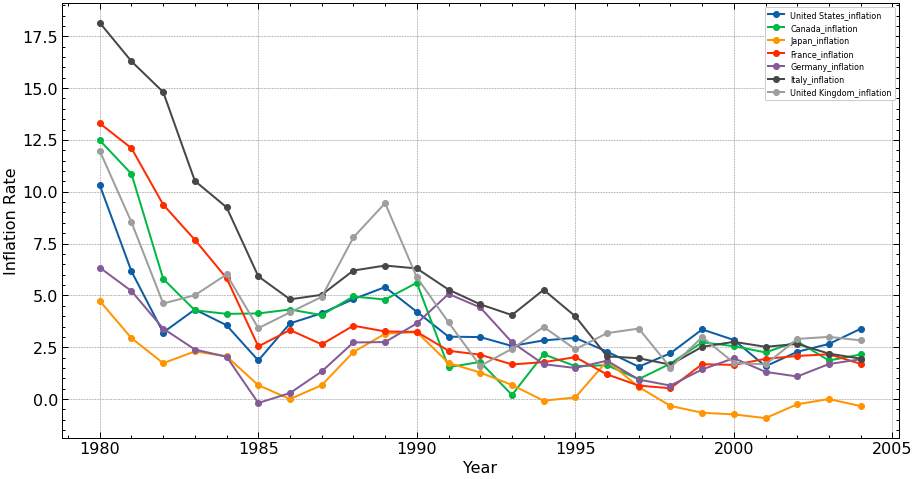

In [4]:
# Gráficos
plt.figure(figsize=(15, 8))

for view in df.columns[8:]:
    plt.plot('Year', view, 'o-', data=df)

plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.show()

### Exercício 1.3

In [24]:
# Lendo e tratando os dados
df = pd.read_excel("dados/ERP-2007/ERP-2007-table110.xls", header=2, skiprows=[3, 4], nrows=22)
df = df[['Period', 'Australia (dollar) 2', 'Canada (dollar)', 'China, P.R. (yuan)', 'Japan (yen)', 'Mexico (peso)', 'South Korea (won)', 'Sweden (krona)', 'Switzerland (franc)', 'United Kingdom (pound) 2']]
df.columns = ['Period', 'Australia', 'Canada', 'China', 'Japan', 'Mexico', 'South Korea', 'Sweden', 'Switzerland', 'United Kingdom']

# Passando o Reino Unido de dolar/libra para libra/dolar
df['United Kingdom'] = np.around(df['United Kingdom'] ** -1, decimals=4)

df.head()

,Period,Australia,Canada,China,Japan,Mexico,South Korea,Sweden,Switzerland,United Kingdom
0,1985,0.7003,1.3659,2.9434,238.47,0.257,872.45,8.6032,2.4552,0.7708
1,1986,0.6709,1.3896,3.4616,168.35,0.612,884.60,7.1273,1.7979,0.6813
2,1987,0.7014,1.3259,3.7314,144.60,1.378,826.16,6.3469,1.4918,0.6098
3,1988,0.7841,1.2306,3.7314,128.17,2.273,734.52,6.1370,1.4643,0.5614
4,1989,0.7919,1.1842,3.7673,138.07,2.461,674.13,6.4559,1.6369,0.6104


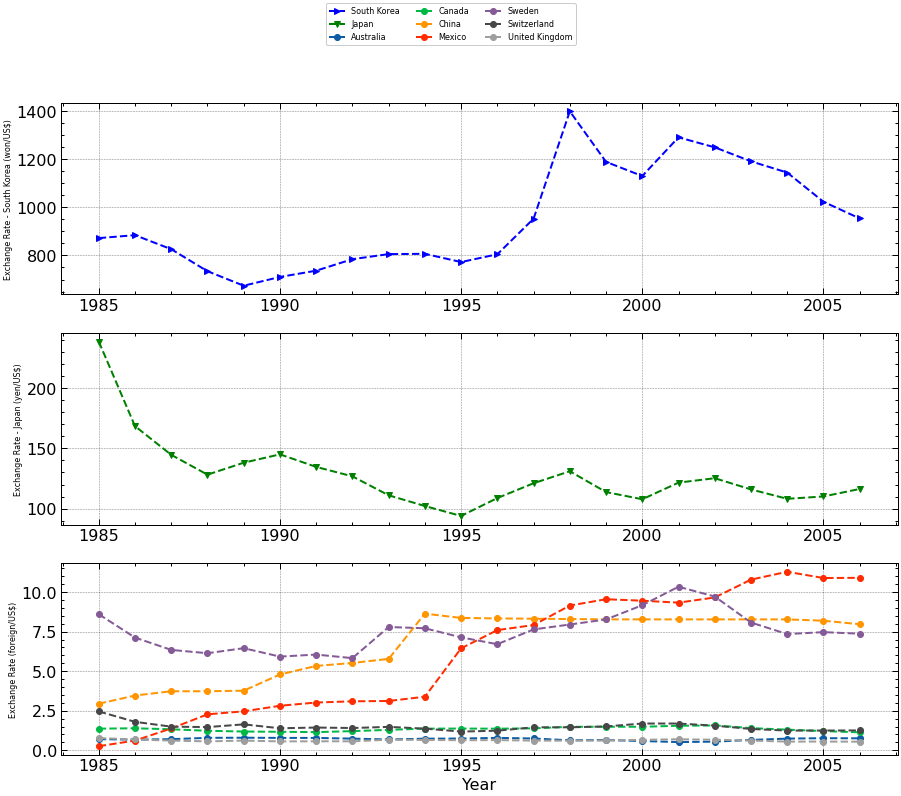

In [49]:
# Gráficos

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

axes[0].plot('Period', 'South Korea', '>--b', data=df)
axes[0].set_ylabel('Exchange Rate - South Korea (won/US$)', fontsize=8)

axes[1].plot('Period', 'Japan', 'v--g', data=df)
axes[1].set_ylabel('Exchange Rate - Japan (yen/US$)', fontsize=8)

for view in df.columns[1:]:
    if view not in ('South Korea', 'Japan'):
        axes[2].plot('Period', view, 'o--', data=df)

fig.legend(loc='upper center', fontsize=8, ncol=3)

axes[2].set_xlabel('Year')
axes[2].set_ylabel('Exchange Rate (foreign/US$)', fontsize=8)
plt.show()

### Exercício 1.7


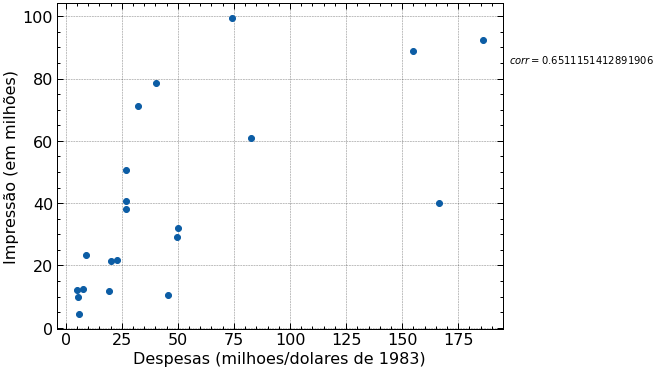

In [8]:
df = pd.read_excel('dados/tvadsdata.xlsx')
df.columns = ['Empresa', 'Impressão (em milhões)', 'Despesas (milhoes/dolares de 1983)']

plt.scatter('Despesas (milhoes/dolares de 1983)', 'Impressão (em milhões)', data=df)
plt.xlabel('Despesas (milhoes/dolares de 1983)')
plt.ylabel('Impressão (em milhões)')

corrcoef = np.corrcoef(df['Despesas (milhoes/dolares de 1983)'], df['Impressão (em milhões)'])[0][1]
plt.text(230, 85, fr'$corr = {corrcoef}$', ha='center', fontsize=10) 
                       
plt.show()

***

## Capítulo 2

### Resumo

- A função de regressão populacional é a função que busca prever o valor esperado $E(Y)$ em função de uma variável $X_i$, isto é, nos diz $E(Y | X_i)$.

    - Função de Regressão Amostral: $Y_i = \hat{\beta} _0 + \hat{\beta} _1 X_i + \hat{u} _i$

- A função do termo de erro estocástico, $u_i$, é captar as variáveis que: (i) foram omitidas durante a construção do modelo; (ii) não são facilmente mensuráveis/estão indisponíveis; e (iii) são fruto do caráter intrinsicamente aleatório do comportamento humano.

- Entendemos como linear um modelo que é linear nos parâmetros, isto é, em $\beta _1$ e $\beta _0$.

### Exercício 2.14

In [4]:
df = pd.read_csv('dados/us-workforce.txt', sep='\t')
display(df.head())
print(df.min())
print(df.max())

# TPFTCH, Taxa de participação na força de trabalho civil, homens (%), Tabela B-39, p.277.
# TPFTCM, Taxa de participação na força de trabalho civil, mulheres (%), Tabela B-39, p.277.
# TDCH, Taxa de desemprego civil, homens (%), Tabela B-42, p.280.
# TDCM, Taxa de desemprego civil, mulheres (%), Tabela B-42, p.280.
# GMH82, ganho médio por hora (em dólares de 1982), Tabela B-47, p.286.
# GMH, ganho médio por hora (em dólares correntes), Tabela B-47, p.286.

,Anos,TPFTCH,TPFTCM,TDCH,TDCM,GMH82,GMH
0,1980,77.4,51.5,6.9,7.4,7.99,6.84
1,1981,77.0,52.1,7.4,7.9,7.88,7.43
2,1982,76.6,52.6,9.9,9.4,7.86,7.86
3,1983,76.4,52.9,9.9,9.2,7.95,8.19
4,1984,76.4,53.6,7.4,7.6,7.95,8.48


Anos      1980.00
TPFTCH      73.30
TPFTCM      51.50
TDCH         3.90
TDCM         4.10
GMH82        7.52
GMH          6.84
dtype: float64

Anos      2006.00
TPFTCH      77.40
TPFTCM      60.00
TDCH         9.90
TDCM         9.40
GMH82        8.27
GMH         16.73
dtype: float64


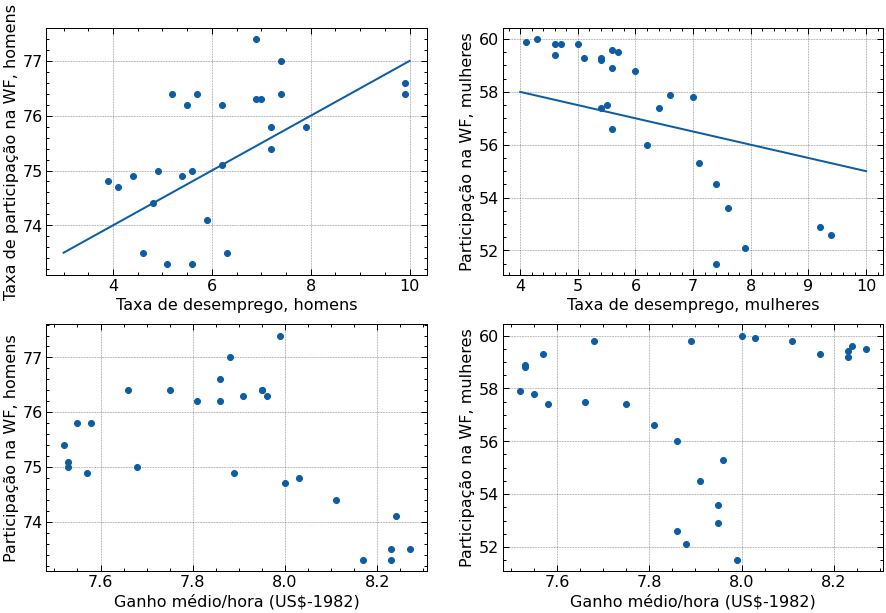

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico [0, 0]
x = np.linspace(3, 10, 10)
y = 72 + 0.5 * x
axes[0, 0].scatter(df['TDCH'], df['TPFTCH'])
axes[0, 0].plot(x, y)
axes[0, 0].set_xlabel("Taxa de desemprego, homens")
axes[0, 0].set_ylabel("Taxa de participação na WF, homens")

# Gráfico [0, 1]
x = np.linspace(4, 10, 10)
y = 60 - 0.5 * x
axes[0, 1].scatter(df['TDCM'], df['TPFTCM'])
axes[0, 1].plot(x, y)
axes[0, 1].set_xlabel("Taxa de desemprego, mulheres")
axes[0, 1].set_ylabel("Participação na WF, mulheres")


# Gráfico [1, 0]
axes[1, 0].scatter(df['GMH82'], df['TPFTCH'])
axes[1, 0].set_xlabel("Ganho médio/hora (US$-1982)")
axes[1, 0].set_ylabel("Participação na WF, homens")

# Gráfico [1, 1]
axes[1, 1].scatter(df['GMH82'], df['TPFTCM'])
axes[1, 1].set_xlabel("Ganho médio/hora (US$-1982)")
axes[1, 1].set_ylabel("Participação na WF, mulheres")

plt.show()

### Exercício 2.15

In [194]:
df = pd.read_excel('dados/india-food.xlsx')
display(df.head())
df.tail()

,Observação,Despesas com Alimentação,Despesa Total
0,1,217,382
1,2,196,388
2,3,303,391
3,4,270,415
4,5,325,456


,Observação,Despesas com Alimentação,Despesa Total
50,51,380,785
51,52,610,788
52,53,530,790
53,54,360,795
54,55,305,801


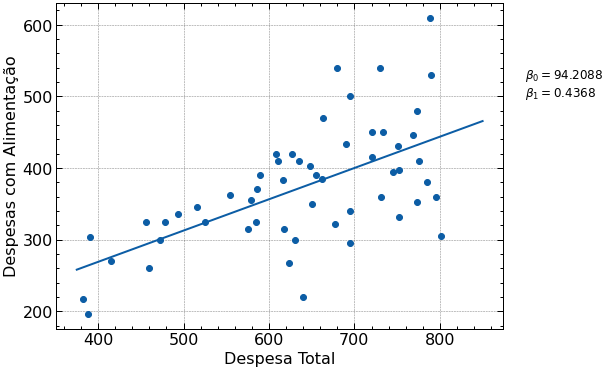

In [101]:
plt.scatter(df['Despesa Total'], df['Despesas com Alimentação'])

# Calculando uma reta de regressão rudimentar
b1 = sum((df['Despesa Total'] - df['Despesa Total'].mean()) * (df['Despesas com Alimentação'] - df['Despesas com Alimentação'].mean())) / sum((df['Despesa Total'] - df['Despesa Total'].mean()) ** 2)
b0 = df['Despesas com Alimentação'].mean() - b1 * df['Despesa Total'].mean()
x = np.linspace(375, 850, 54)
y = b0 + b1 * x
plt.plot(x, y)

txt = '\n'.join((fr'$\beta_0 ={b0:.4f}$', fr'$\beta_1={b1:.4f}$'))
plt.xlabel('Despesa Total')
plt.ylabel('Despesas com Alimentação')
plt.text(900, 500, txt, fontsize=12)
plt.show()

- Neste exemplo, podemos ver que famílias com um nível de renda maior tendem a gastar mais com a alimentação. Entretanto, o crescimento desse gasto não é de 1 para 1, isto é, um aumento de 1% na renda leva a um aumento de menos de 1% no gasto com alimentação.

### Exercício 2.16

In [203]:
df = pd.read_excel('dados/sat-scores.xlsx', sheet_name='sat-1', skiprows=[0], index_col=0)

cols = [("Aptidão Verbal", "Homens"), ("Aptidão Verbal", "Mulheres"), ("Aptidão Verbal", "Total"),
        ("Matemática", "Homens"), ("Matemática", "Mulheres"), ("Matemática", "Total")]
df.columns = pd.MultiIndex.from_tuples(cols)

df.head()

Aptidão Verbal                Matemática               
             Homens Mulheres Total     Homens Mulheres Total
Ano                                                         
1972            531      529   530        527      489   509
1973            523      521   523        525      489   506
1974            524      520   521        524      488   505
1975            515      509   512        518      479   498
1976            511      508   509        520      475   497

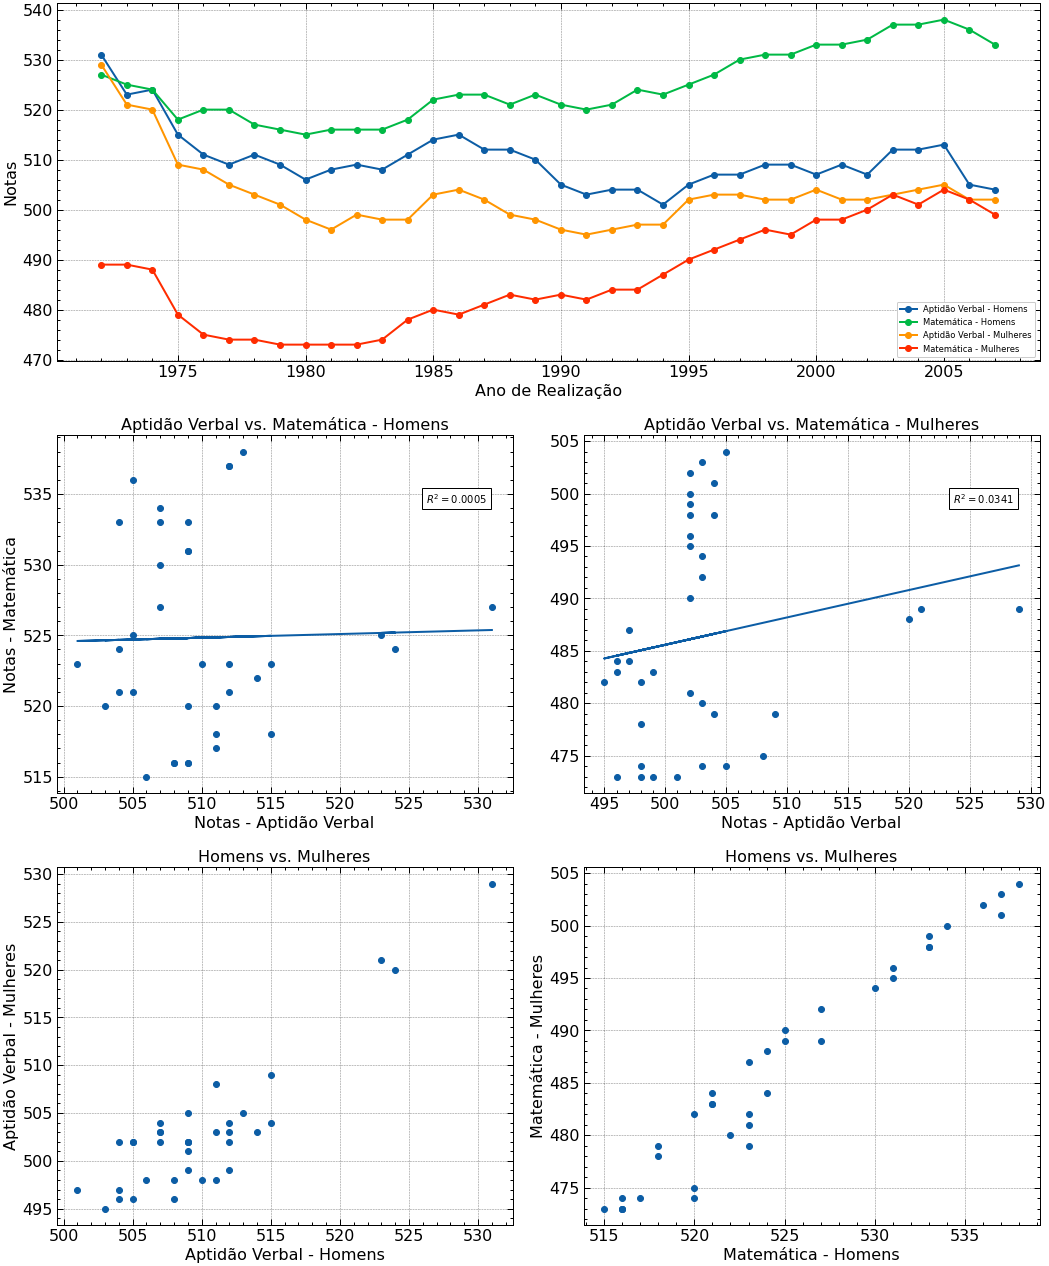

In [200]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Gráfico superior
axes[0, 0] = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2)
axes[0, 0].plot(df.index, df["Aptidão Verbal", "Homens"], 'o-', label="Aptidão Verbal - Homens")
axes[0, 0].plot(df.index, df["Matemática", "Homens"], 'o-', label="Matemática - Homens")
axes[0, 0].plot(df.index, df["Aptidão Verbal", "Mulheres"], 'o-', label="Aptidão Verbal - Mulheres")
axes[0, 0].plot(df.index, df["Matemática", "Mulheres"], 'o-', label="Matemática - Mulheres")


# Gráfico esquerdo + linha de regressão
x = np.array(df["Aptidão Verbal", "Homens"]).reshape(-1, 1)
y = np.array(df["Matemática", "Homens"])
reg = LinearRegression().fit(x, y)
line = reg.predict(x)
r = reg.score(x, y) 

axes[1, 0].scatter(df["Aptidão Verbal", "Homens"], df["Matemática", "Homens"])
axes[1, 0].plot(df["Aptidão Verbal", "Homens"], line)
axes[1, 0].text(0.81, 0.81, fr"$R^2 = {r:.4f}$", transform=axes[1, 0].transAxes, bbox=dict(facecolor='white', edgecolor='black'))

# Gráfico direito + linha de regressão
x = np.array(df["Aptidão Verbal", "Mulheres"]).reshape(-1, 1)
y = np.array(df["Matemática", "Mulheres"])
reg = LinearRegression().fit(x, y)
line = reg.predict(x)
r = reg.score(x, y) 

axes[1, 1].scatter(df["Aptidão Verbal", "Mulheres"], df["Matemática", "Mulheres"])
axes[1, 1].plot(df["Aptidão Verbal", "Mulheres"], line)
axes[1, 1].text(0.81, 0.81, fr"$R^2 = {r:.4f}$", transform=axes[1, 1].transAxes, bbox=dict(facecolor='white', edgecolor='black'))


# Gráfico inferior esquerdo
axes[2, 0].scatter(df["Aptidão Verbal", "Homens"], df["Aptidão Verbal", "Mulheres"])

# Gráfico inferior direito
axes[2, 1].scatter(df["Matemática", "Homens"], df["Matemática", "Mulheres"])

# Títulos, legendas, etc
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_ylabel("Notas")
axes[0, 0].set_xlabel("Ano de Realização")

axes[1, 0].set_ylabel("Notas - Matemática")
axes[1, 0].set_xlabel("Notas - Aptidão Verbal")
axes[1, 0].set_title("Aptidão Verbal vs. Matemática - Homens")

axes[1, 1].set_title("Aptidão Verbal vs. Matemática - Mulheres")
axes[1, 1].set_xlabel("Notas - Aptidão Verbal")

axes[2, 0].set_title("Homens vs. Mulheres")
axes[2, 0].set_xlabel("Aptidão Verbal - Homens")
axes[2, 0].set_ylabel("Aptidão Verbal - Mulheres")

axes[2, 1].set_title("Homens vs. Mulheres")
axes[2, 1].set_xlabel("Matemática - Homens")
axes[2, 1].set_ylabel("Matemática - Mulheres")

fig.tight_layout(pad=1.8)
plt.show()

- Os gráficos do meio mostram uma linha de regressão simples que prevê a a nota de matemática partindo da nota de aptidão verbal dos alunos. Como é possível ver, o $R^2$ do modelo para os homens não é muito alto, o que indica baixa eficácia para prever as notas. 
- Os dois gráficos inferiores mostram que as notas dos alunos evoluíram com o tempo em ambos os testes.

***

## Capítulo 03